# Learning curves

In [375]:
def polyFeatures(X, degree):
    X_poly = np.zeros((X.shape[0], degree))
    X_poly[:, 0] = X.reshape(-1)
    for i in range(1, degree):
        X_poly[:, i] = (X**(i+1)).reshape(-1)
    return X_poly

In [376]:
def mapFeature(X):
    mu = np.mean(X, axis=0).reshape(1,-1)
    X_norm = X-mu
    sigma = np.std(X, axis=0, ddof=1).reshape(1,-1)
    X_norm = X_norm/sigma
    return X_norm, mu, sigma

In [377]:
def validationCurve(X, y, X_val, y_val):
    lambdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    cost_val = []
    cost_train = []
    for i in range(len(lambdas)):
        _lambda = lambdas[i]
        theta = train(X, y, _lambda, False)
        cost_train.append(costFunction(X, y, theta, 0)[0])
        cost_val.append(costFunction(X_val, y_val, theta, 0)[0])
    
    return lambdas, cost_train, cost_val

In [378]:
def train(X, y, _lambda, disp=True):
    
    theta_0 = np.zeros((X.shape[1], 1))
    
    J = lambda theta: costFunction(X, y, theta, _lambda)[0]
    dJ = lambda theta: costFunction(X, y, theta, _lambda)[1]
    theta = optimize.fmin_cg(J, theta_0, fprime=dJ, maxiter=400, gtol=0.001, disp=disp)
    return theta

In [379]:
def costFunction(X, y, theta, _lambda):
    m = y.shape[0]
    n = X.shape[1]
    
    theta = theta.reshape(-1,1)
    
    grad = np.zeros(theta.shape)
    h = X@theta
    J = 1/(2*m) * ((h-y).T@(h-y) + _lambda*(theta[1:].T@theta[1:]))
    
    grad[0] = 1/m * ((X[:,0]).T@(h-y)) 
    grad[1:] = 1/m * (X[:,1:].T@(h-y) + _lambda*theta[1:])
    
    grad = grad.reshape(-1)
    
    return J.item(), grad

In [380]:
def learningCurve(X, y, X_val, y_val, _lambda):
    m = X.shape[0]
    cost_train = []
    cost_val = []
    for i in range(m):
        theta = train(X[0:i+1,:], y[0:i+1], _lambda, False)
        cost_train.append(costFunction(X[0:i+1,:], y[0:i+1], theta, 0)[0])
        cost_val.append(costFunction(X_val, y_val, theta, 0)[0])
        
    return cost_train, cost_val

# Plotting training data

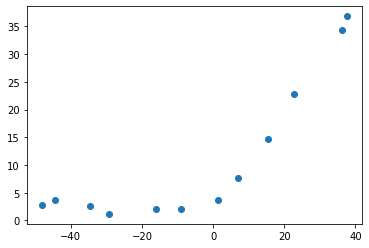

In [381]:
from scipy import optimize

import scipy.io

import numpy as np
import matplotlib.pyplot as plt


data = scipy.io.loadmat('../MATLAB/ex5data1.mat')
X_train = data['X']
y_train = data['y']
X_val = data['Xval']
y_val = data['yval']
X_test = data['Xtest']
y_test = data['ytest']

plt.plot(X_train, y_train, 'o')

# Training the model

Optimization terminated successfully.
         Current function value: 22.379542
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


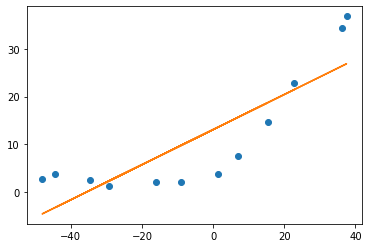

In [411]:
ones = np.ones((m,1))

_lambda = 1

theta = train(np.append(ones, X_train, axis=1), y_train, _lambda, True)

plt.plot(X_train, y_train, 'o')
plt.plot(X_train, np.append(ones, X_train, axis=1)@theta)

# Learning curve Cost Vs Number of training examples

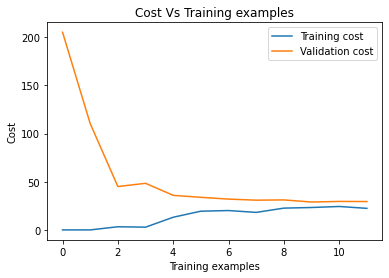

In [383]:
_lambda = 0

cost_train, cost_val = learningCurve(np.append(ones, X_train, axis=1), y_train, np.append(np.ones((X_val.shape[0],1)), X_val, axis=1), y_val, _lambda)

plt.plot(np.arange(m), cost_train, label='Training cost')
plt.plot(np.arange(m), cost_val, label='Validation cost')
plt.legend(loc = 'best')
plt.title('Cost Vs Training examples')
plt.ylabel('Cost')
plt.xlabel('Training examples')
plt.show()

# Learning curve Cost Vs Lambda

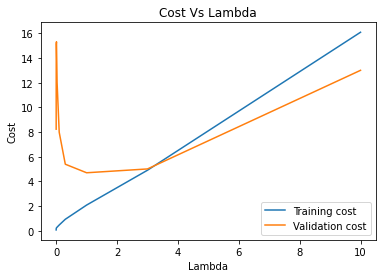

Training cost:  0.06068415188621691  CV Cost:  8.229603279652617  Lambda:  0
Training cost:  0.1140987655827548  CV Cost:  11.505840687741403  Lambda:  0.001
Training cost:  0.17877772552567098  CV Cost:  15.140380626311655  Lambda:  0.003
Training cost:  0.22630682788915674  CV Cost:  15.315746930513825  Lambda:  0.01
Training cost:  0.28295129599036406  CV Cost:  12.017321873055414  Lambda:  0.03
Training cost:  0.4607887751881239  CV Cost:  7.977711153901055  Lambda:  0.1
Training cost:  0.9233445436722445  CV Cost:  5.3890803776300515  Lambda:  0.3
Training cost:  2.075608231662952  CV Cost:  4.695711008114066  Lambda:  1
Training cost:  4.9012795292287  CV Cost:  5.005630160721958  Lambda:  3
Training cost:  16.091589545998236  CV Cost:  13.003836698886916  Lambda:  10


In [392]:
X = polyFeatures(X_train, 8)
X, mu, sigma = mapFeature(X)
X = np.append(ones, X, axis=1)

X_val2 = polyFeatures(X_val, 8)
X_val2, mu2, sigma2 = mapFeature(X_val2)
X_val2 = np.append(np.ones((X_val2.shape[0], 1)), X_val2, axis=1)

lambdas, cost_train, cost_val = validationCurve(X, y_train, X_val2, y_val)

plt.plot(lambdas, cost_train, label='Training cost')
plt.plot(lambdas, cost_val, label='Validation cost')
plt.legend(loc = 'best')
plt.title('Cost Vs Lambda')
plt.ylabel('Cost')
plt.xlabel('Lambda')
plt.show()

for i in range(len(lambdas)):
    print('Training cost: ',cost_train[i],' CV Cost: ',cost_val[i], ' Lambda: ',lambdas[i])

Optimization terminated successfully.
         Current function value: 0.060684
         Iterations: 238
         Function evaluations: 462
         Gradient evaluations: 462


(12,)

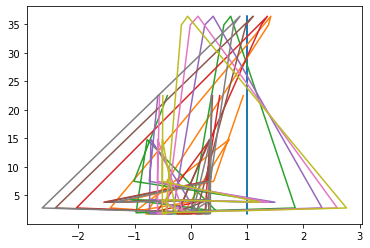

In [415]:
theta = train(X, y_train, _lambda=0, disp=True)

plt.plot(X, X@theta)

(X@theta).shape

In [416]:
pd.DataFrame(theta)

,0
0,11.218091
1,11.010863
2,18.327260
3,15.491575
4,-28.962938
5,-33.142754
6,24.658234
7,23.328558
8,-3.578593
